### 주성분 분석(PCA)
- 데이터에 있는 분산이 큰 방향으로 찾는 것으로 이해(분산: 데이터가 멀리 퍼져있는 정도)
- 그래프를 보면 직선이 원점으로 출발한다면 두 원소로 이루어진 벡터로 쓸 수 있다. 이 벡터를 주성분(Principal component)이라고 부른다.
- 주성분 벡터는 원본 데이터에 있는 방향, 즉 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같다.

### PCA 클래스
- Scikit-learn은 sklearn.decomposition 모듈 아래 PCA 클래스로 주성분 분석 알고리즘을 제공
- PCA Class 객체를 만들 때 n_components 매개변수에 주성분의 개수를 지정해야 한다.
- KMeans과 마찬가지로 비지도 학습이기 때문에 fit() Method에 타깃값 제공 X

In [36]:
import numpy as np

In [37]:
fruits = np.load('fruits_300.npy')

In [38]:
fruits_2d = fruits.reshape(-1, 100*100)

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [40]:
# n_components=50으로 지정했기 때문에 pca.components_ 배열의 첫번째 차원이 50, 즉 50개의 주성분을 찾음
# 두번째 차원은 항상 원본 데이터의 특성 개수와 같은 10,000 이다.
print(pca.components_.shape)

(50, 10000)


In [41]:
# 각 Cluster가 어떤 이미지를 나타냈는지 출력 하기 위해서 draw_fruits()함수를 사용해서 출력
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr) # n: sample 개수
    rows = int(np.ceil(n/10)) # 한줄에 10개씩 이미지를 그린다. 샘플 개수는 10으로 나누어서 전체 행 개수를 계산
    cols = n if rows < 2 else 10 # row가 1개면 column의 개수는 Sample 개수, 그렇지 않으면 10개
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n: # n개 까지만 그린다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

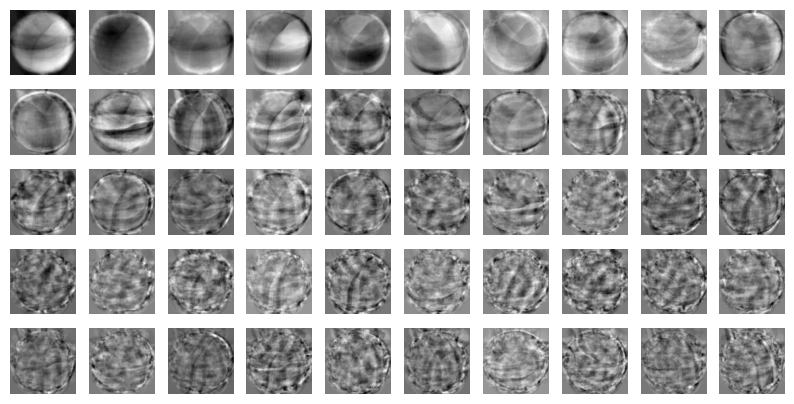

In [42]:
# 원본 데이터와 차원이 같으므로 주성분을 100 x 100 크기를 이미지처럼 출력 할 수 있음.
# draw_fruits() 함수를 이용해서 그림으로 그릴수 있다.
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [43]:
# 주성분을 찾았으므로, 원본 데이터에 투영하여 특성의 개수는 10,000 -> 50개로 줄일수 있음
# 이는 원본 데이터를 각 주성분으로 분해하는 것으로 생각할 수 있음.
print(fruits_2d.shape)

(300, 10000)


In [44]:
# PCA의 transform() Method를 이용해서 원본 데이터의 차원을 50으로 줄여본다.
# 50개의 주성분을 찾은 PCA 모델을 사용해 이를 (300,50) 크기의 배열로 변환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


### 원본 데이터 재구성
- 특성을 10,000개에서 50개로 줄였기 때문에 어느정도 데이터 손실이 발생
- 하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성 가능
- PCA 클래스는 이를 위해 inverse_transform() Method를 제공, 50개의 차원으로 축소한 fruits_pca 데이터를 전달해 10,000개 특성을 복원

In [45]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


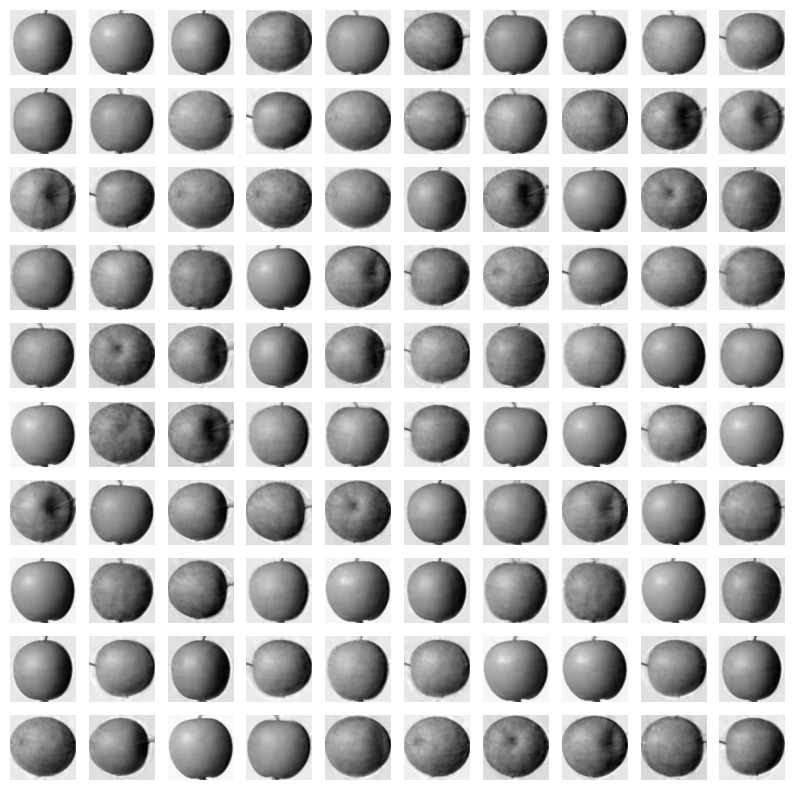

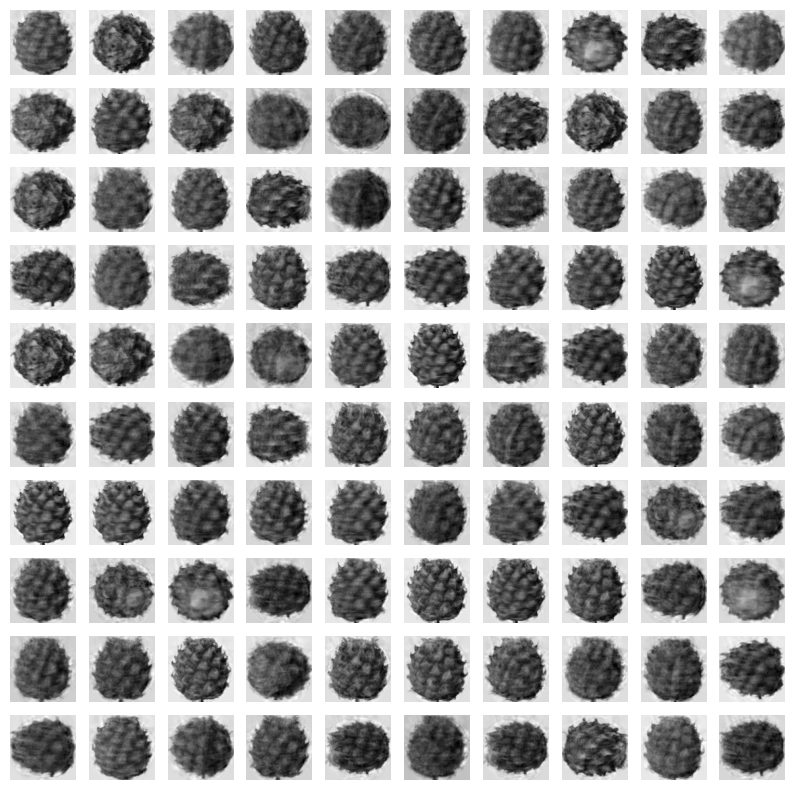

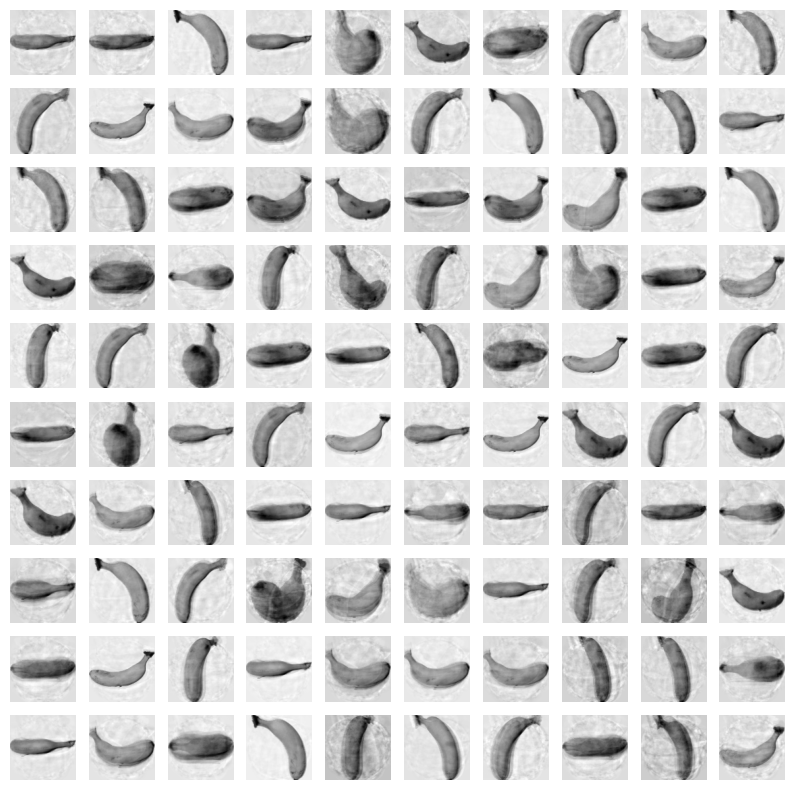

In [46]:
# 예상대로 10,000개의 특성들이 복원됨
# 이 데이터를 100x100 크기로 나누어서 100개씩 나누어서 출력, 이 데이터는 순서대로 사과, 파인애플, 바나나를 100개씩 나눠서 담고 있다.
# 일부 흐리고 번진 부분이 있지만 50개의 특성을 10,000개로 늘린것 치곤 놀라운일. 이 50개의 분산을 가장 잘 보존하도록 변환된것.
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

### 설명된 분산
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 explained variance (설명된 분산)이라고 한다.
- PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있음 (첫 번째 주성분의 분산이 제일 크다)
- 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.

In [47]:
# 값을 보면, 92%가 넘는 분산을 유지하고 있음. 특성에서 원본 데이터를 복원했을때 원본 이미지의 품질이 높은 이유를 볼 수 있다.
print(np.sum(pca.explained_variance_ratio_))

0.921518338315533


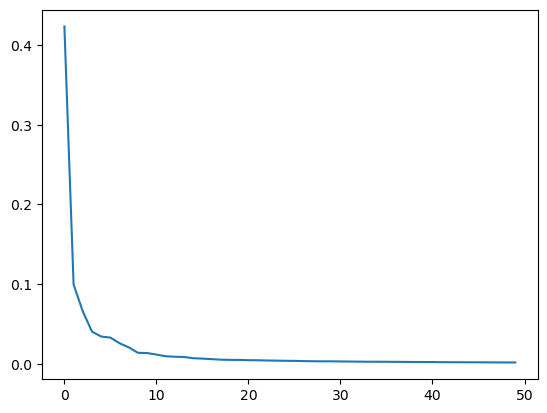

In [48]:
# 설명된 분산의 비율을 그래프로 그려 보면 적절한 주성분의 개수를 찾는 데 도움이 된다.
# 그래프를 보면 처음 10개의 주성분이 대부분의 분산 표현, 다음부터는 비교적 작다.
plt.plot(pca.explained_variance_ratio_)
plt.show()

### 다른 알고리즘과 함께 사용하기
- PCA로 축소한 데이터를 사용하여 Supervised Learning(지도 학습)에 적용 & 차이 표현
- 3개의 과일 사진을 분류해야 하기 때문에 간단한 Logistic Regression 모델을 사용

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [50]:
# 지도 모델 사용시 타깃값이 있어야 한다. (사과-0, 파인애플-1, 바나나-2)로 지정
# PythonList와 정수를 곱하면 리스트 안의 원소를 정수만큼 반복, 이를 이용시 각 100개의 Target Data를 만들수 있다.
target = np.array([0]*100 + [1]*100 + [2]*100)

In [51]:
# 원본 데이터인 fruits_2d를 사용, 성능을 가늠해 보기 위해 cross_validate()로 교차검증
# PCA로 훈련 대이터의 차원을 축소하면 저장공간 확장 & ML 모델의 훈련속도 올릴수 있다.
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.27798914909362793


In [52]:
# n_components에 주성분의 개수 지정, 이 대신 원하는 설명된 분산의 비율 입력 가능(여기서는 0.5 = 50%)
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [53]:
# 주성분 개수 대신 0~1 사이의 비율을 실수로 입력하면 된다. 몇개의 주성분을 찾았는지 확인
# 결과로, 2개의 특성만으로 원본 데이터에 있는 분산의 50% 표현 가능
print(pca.n_components_)

2


In [54]:
# 이 모델로 원본 데이터 변환 -> 주성분이 2개이므로 변환된 데이터의 크기는 (300,2)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [55]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.011793136596679688


/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [57]:
# 차원 축소된 데이터를 이용해서 KMeans 알고리즘으로 Cluster를 찾아봄
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


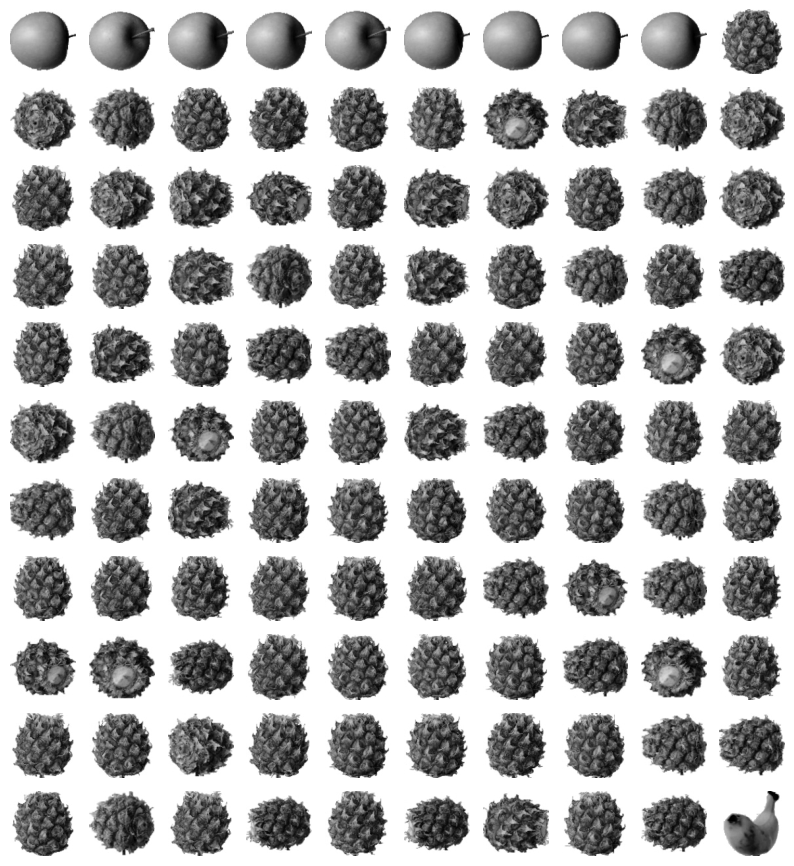

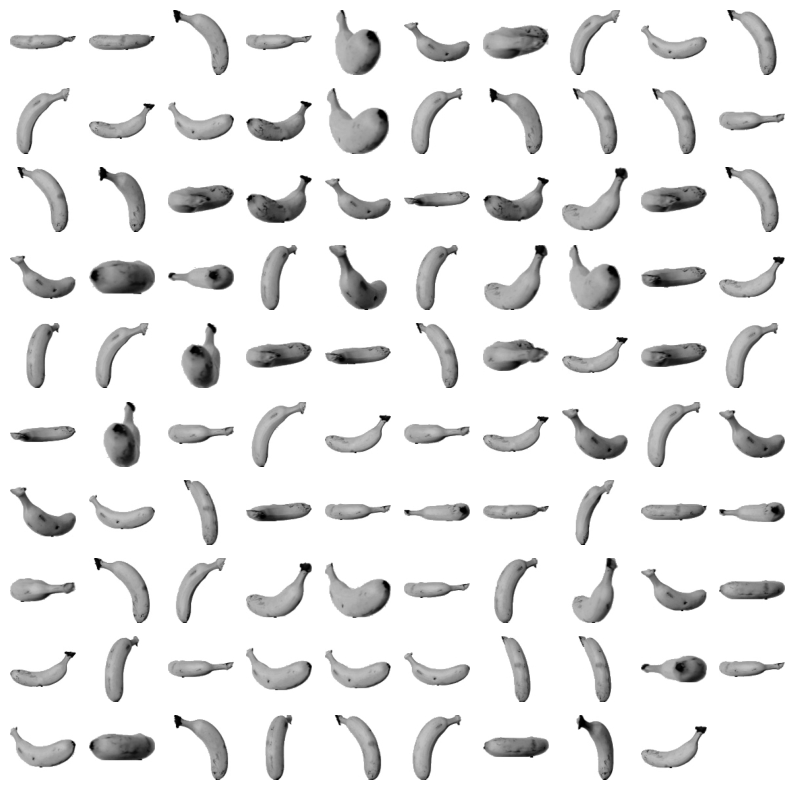

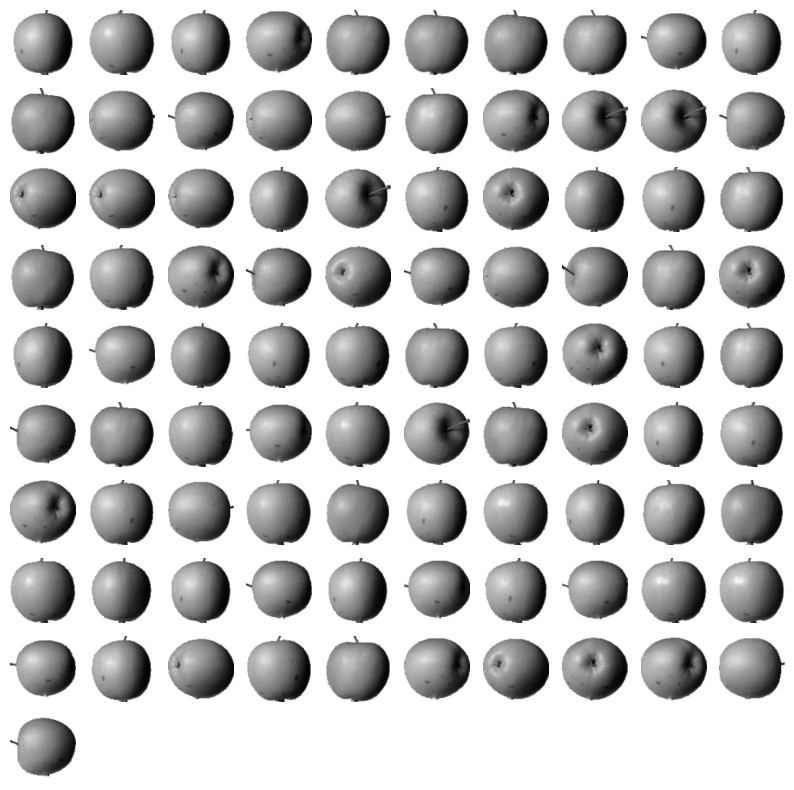

In [58]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

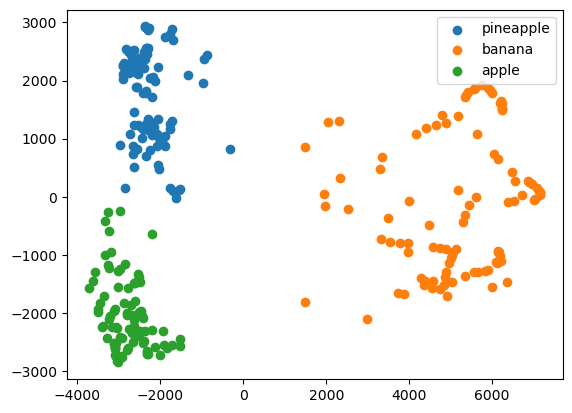

In [61]:
# 훈련데이터의 자원을 줄이면 얻을수 있는 장점은 시각화, 3개 이하로 차원을 줄이면 화면에 출력하기 쉽다.
# fruits_pca data는 2개의 특성이 있기 때문에 2차원으로 표현 가능
# km.labels_를 사용해 클러스터별로 나누어 산점도를 그려봄
# 사과의 파일애플의 Cluster의 경계가 가까이 붙어있음, 몇개의 샘플은 혼동을 일으킬 수도 있다.
# 데이터 시각화시, 예상치 못한 통찰을 얻을수 있음, 이런면으로 보면 차원 축소는 매우 요용한 도구중 하나
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()